<a href="https://colab.research.google.com/github/rajkgoel/AW-Internet-Sales1/blob/master/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning**
**Phase 1: Foundations**
1. Linear Regression (core + prediction)
2. Regression error metrics (MAE, MSE, RMSE)
3. Feature Scaling (Normalization vs Standardization)


**Phase 2: Model Behavior**

4. Generalization & Overfitting
5. Polynomial Regression
6. Multicollinearity & VIF


**Phase 3: Regularization**

7. Ridge Regression
8. Lasso Regression


**Phase 4: Classification**

9. Logistic Regression
10. Sigmoid & Decision Boundary
11. Log-Loss

**Part 1 - Linear Regression**

Linear Regression predicts a continuous value using a weighted sum of features and an intercept.

           y^​= wᵀ*x + b


In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Data
X = np.array([[500], [1000], [1500], [2000]])
y = np.array([30, 60, 90, 120])

# Model
model = LinearRegression()
model.fit(X, y)

# Learned parameters
print("Coefficient (price increase psft):", model.coef_[0])
print("Intercept (base price when area = 0):", model.intercept_)

# Prediction
print("Predicted price for 1800 sq ft (plugs into wx+b):", model.predict([[1800]])[0])
print("A feature with zero weight has no influence on the model’s prediction.")

Coefficient (price increase psft): 0.060000000000000005
Intercept (base price when area = 0): 0.0
Predicted price for 1800 sq ft (plugs into wx+b): 108.00000000000001


**Part 2 - MAE, MSE, RMSE**

These measure how wrong predictions are.

Metric	Meaning
 - MAE:	Average absolute error
 - MSE:	Average squared error
 - RMSE:	Square root of MSE

**Actual vs Predicted house prices (₹ lakh)**

Actual	Predicted

100	    90

150	    160

200	    210

Errors - [-10, 10, 10]

MAE = $|-10| + |10| + |10|/3$ = 30/3 = 10

MSE = $(100+100+100)/3$ = 100

RMSE = $\sqrt{100}$ = 10

RMSE is more sensitive to outliers because it squares the errors, giving larger penalties to big mistakes. RMSE is preferred because it penalizes large errors more heavily, making it easier to detect and discourage serious prediction mistakes.

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_true = np.array([100, 150, 200])
y_pred = np.array([90, 160, 210])

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


MAE: 10.0
MSE: 100.0
RMSE: 10.0


**Part 3 - Feature Scaling**

Feature scaling brings all features to a comparable range so that learning is stable, fair, and fast.
It is critical for:
 - Gradient Descent
 - Ridge / Lasso
 - Logistic Regression
 - Distance-based models

**Why scaling matters?**

Predict house price using:
 - Area (sq ft) → 500 to 5000
 - Age of house (years) → 1 to 30

Without scaling Area dominates just because numbers are bigger, Age effect is ignored or unstable

**Two common scaling methods**

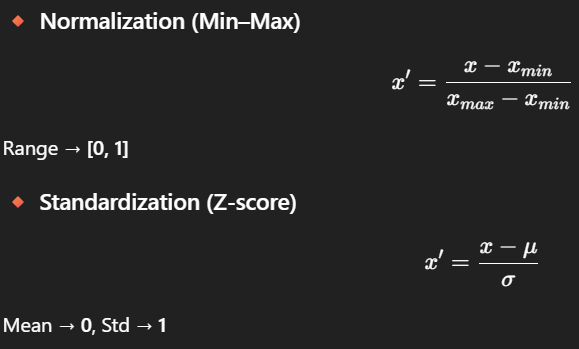

**Impact Summary**

 - Prevents one feature from overpowering others
 - Makes weights stable
 - Essential for regularization
 - Does NOT change relationships, only scale


In [6]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X = np.array([
    [500, 1],
    [1500, 10],
    [3000, 20],
    [5000, 30]
])

# Normalization
minmax = MinMaxScaler()
X_norm = minmax.fit_transform(X)

# Standardization
standard = StandardScaler()
X_std = standard.fit_transform(X)

print("Normalized:\n", X_norm)
print("\nStandardized:\n", X_std)


Normalized:
 [[0.         0.        ]
 [0.22222222 0.31034483]
 [0.55555556 0.65517241]
 [1.         1.        ]]

Standardized:
 [[-1.17953565 -1.31355934]
 [-0.58976782 -0.48394291]
 [ 0.29488391  0.43785311]
 [ 1.47441956  1.35964914]]


**Part 4 - Generalization & Overfitting**

1️⃣ Concept
Generalization is how well a model performs on unseen (test) data.

 - Good model → similar train error & test error
 - Overfitting → very low train error, high test error
 - Underfitting → high error on both

2️⃣ Real-world intuition 🌍
Example: Exam preparation

👉 Overfitting - You memorize answers → perfect on practice questions → fail new questions

👉 Generalization - You understand concepts → good on new questions

Same idea in ML.

3️⃣ How overfitting happens in ML

Common causes:
- Model too complex (high-degree polynomial)
- Too many features
- Too little data
- Noise in training data

Overfitting occurs when a model learns noise instead of patterns, performing well on training data but poorly on unseen data.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Data
X_input = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
print("X_input: ", X_input)
y_output = np.array([1.2, 1.9, 3.0, 3.9, 5.1])

# Linear model
lin = LinearRegression()
lin.fit(X_input, y_output)
y_pred_lin = lin.predict(X_input)
print(f"Linear Equation: y = {model.coef_[0]:.2f} * x + {model.intercept_:.2f}")
print("y_pred_lin: ", y_pred_lin)

# Polynomial model (degree 4)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_input)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_output)
y_pred_poly = poly_model.predict(X_poly)

print("Linear MSE:", mean_squared_error(y, y_pred_lin))
print("Polynomial MSE:", mean_squared_error(y, y_pred_poly))


X_input:  [[1]
 [2]
 [3]
 [4]
 [5]]
Linear Equation: y = 0.06 * x + 0.00
y_pred_lin:  [1.06 2.04 3.02 4.   4.98]
Linear MSE: 0.012799999999999978
Polynomial MSE: 9.61907405542556e-28


# Part 5 - Polynomial Regression

Polynomial Regression is still Linear Regression, but:
- We transform features by adding powers of 𝑥
- The model stays linear in weights

$y= w_0 + w_1x^1 + w_2x^2 + w_3x^3  $

So:
- Degree = highest power of x
- Higher degree → more flexible curve